In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('perceptron data.csv', header=None)

# Get the data and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [55]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X, W) + b)[0])

def perceptronStep(X, y, W, b, learn_rate=0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i], W, b)
        if y[i] - y_hat == 1:
            W[0] += X[i][0] * learn_rate
            W[1] += X[i][1] * learn_rate
            b += learn_rate
        elif y[i] - y_hat == -1:
            W[0] -= X[i][0] * learn_rate
            W[1] -= X[i][1] * learn_rate
            b -= learn_rate
    return W, b

def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2, 1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0] / W[1], -b / W[1]))
    return boundary_lines


In [57]:
# Train the perceptron algorithm
boundary_lines = trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25)

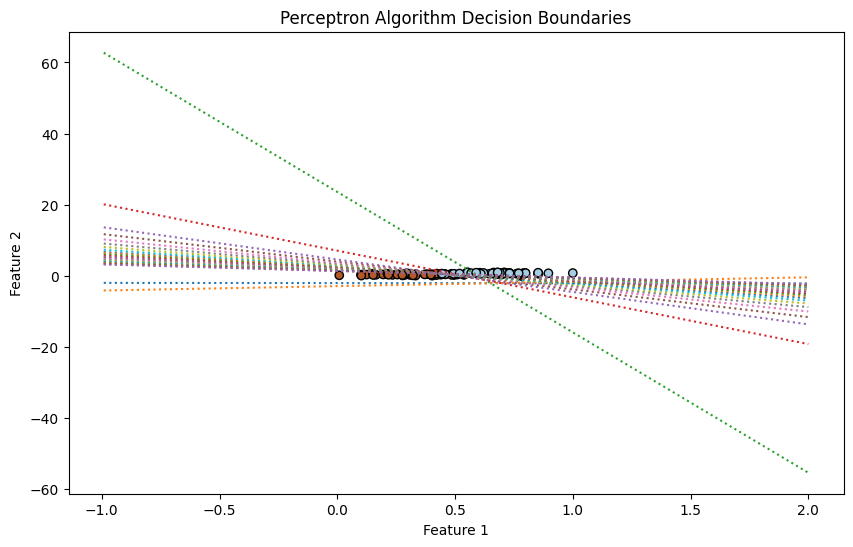

In [59]:
# Plotting function
def plot_boundary(X, y, boundary_lines):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    for W, b in boundary_lines:
        plt.plot([x_min, x_max], [W * x_min + b, W * x_max + b], linestyle='dotted')
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Algorithm Decision Boundaries')
    plt.show()

# Plot the decision boundaries
plot_boundary(X, y, boundary_lines)


In [34]:
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2, 1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0] / W[1], -b / W[1]))
    return boundary_lines, W, b

In [37]:
# Train the perceptron algorithm
boundary_lines, final_W, final_b = trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25)


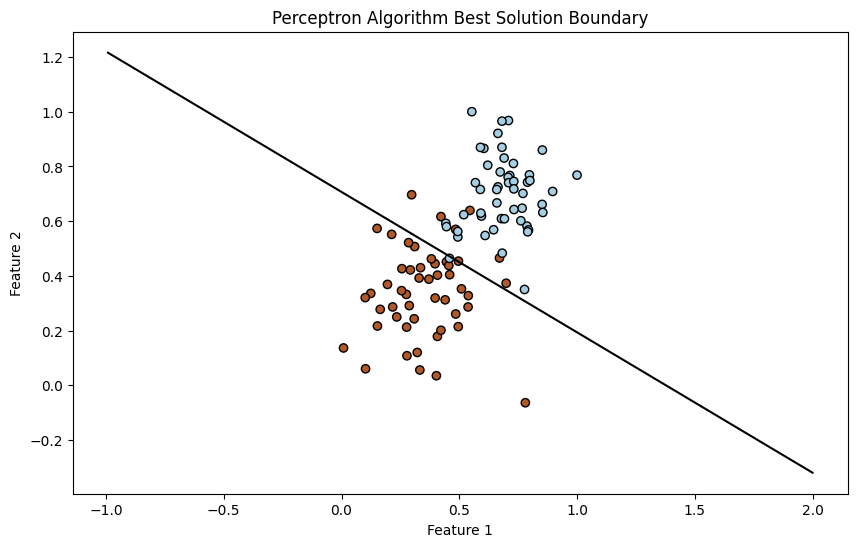

In [39]:
# Plotting function for the best solution
def plot_best_solution(X, y, W, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min = (W[0] * x_min + b) / -W[1]
    y_max = (W[0] * x_max + b) / -W[1]
    plt.plot([x_min, x_max], [y_min, y_max], 'k-')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Algorithm Best Solution Boundary')
    plt.show()

# Plot the best solution boundary
plot_best_solution(X, y, final_W, final_b)
